# Dictionary

* **HS** : hate speech label;
* **Abusive** : abusive language label;
* **HS_Individual** : hate speech targeted to an individual;
* **HS_Group** : hate speech targeted to a group;
* **HS_Religion** : hate speech related to religion/creed;
* **HS_Race** : hate speech related to race/ethnicity;
* **HS_Physical** : hate speech related to physical/disability;
* **HS_Gender** : hate speech related to gender/sexual orientation;
* **HS_Gender** : hate related to other invective/slander;
* **HS_Weak** : weak hate speech;
* **HS_Moderate** : moderate hate speech;
* **HS_Strong** : strong hate speech.


# Import Library

In [25]:
import gdown                      # to load data from gdrive
import pandas as pd               # library used for working with data sets and perform data analysis
import numpy as np                # to perform mathematical operasion and statistic
import seaborn as sns             # to perform data visualization
import matplotlib.pyplot as plt   # to perform data visualization
import sql
import collections
from collections import Counter

# Import Dataset

In [26]:
# Import dataset csv format from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Read CSV file from Google Drive with specified encoding
df             = pd.read_csv('/content/drive/MyDrive/Asset Challenge/data.csv', encoding='latin-1')
kamus_abusive  = pd.read_csv('/content/drive/MyDrive/Asset Challenge/abusive.csv', encoding='latin-1')
kamusalay      = pd.read_csv('/content/drive/MyDrive/Asset Challenge/new_kamusalay.csv', encoding='latin-1', header= None)
kamusalay_dict = kamusalay.rename(columns={0: 'alay', 1: 'normal'})

# Data Shape

In [46]:
# Check data information in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [47]:
# View data coloumn and index
df.shape

(13169, 13)

In [48]:
df.head(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [49]:
df.tail(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [ ]:
df.HS.value_counts()

HS
0    7608
1    5561
Name: count, dtype: int64

In [ ]:
df.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

In [ ]:
print("Toxic shape: ", df[(df["HS"] == 1) | (df["Abusive"] == 1)].shape)
print("Non-toxic shape: ", df[(df["HS"] == 0) & (df["Abusive"] == 0)].shape)


Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [ ]:
print(kamusalay.head(15))
print("Shape: ", kamusalay.shape)

                      0                         1
0   anakjakartaasikasik  anak jakarta asyik asyik
1          pakcikdahtua         pak cik sudah tua
2        pakcikmudalagi         pak cik muda lagi
3           t3tapjokowi              tetap jokowi
4                    3x                 tiga kali
5                aamiin                      amin
6               aamiinn                      amin
7                 aamin                      amin
8               aammiin                      amin
9                  abis                     habis
10               abisin                  habiskan
11                 acau                     kacau
12                achok                      ahok
13                   ad                       ada
14                 adek                      adik
Shape:  (15167, 2)


In [ ]:
import re
import unicodedata

# Converts text to lowercase
def lowercase(text):
    return text.lower()

def remove_unicode(text):
    text = re.sub(r'\bx[a-fA-F0-9]{2}\b', '', text)
    text = re.sub(r'\bx([a-fA-F0-9]{2})', '', text)
    return text

def remove_unnecessary_char(text):
    import re

    text = re.sub('\n', ' ', str(text))                                               # Replace newline characters with space
    text = re.sub('\t', ' ', str(text))                                               # Replace tab characters with space
    text = re.sub('rt', ' ', str(text))                                               # remove RT (retweet) symbol
    text = re.sub('user', ' ', str(text))                                             # remove username "user"
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', text)   # remove URLs from the text
    text = re.sub('   +', ' ', str(text))                                             # remove extra spaces
    text = text.strip()                                                               # remove strip leading and trailing spaces
    text = re.sub(r'\d+', '', str(text))                                              # remove numeric characters
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

In [ ]:
print(kamusalay_dict.columns)

Index(['alay', 'normal'], dtype='object')


In [ ]:
kamusalay = dict(zip(kamusalay_dict['alay'], kamusalay_dict['normal']))
def normalize_alay(text):
    return ' '.join([kamusalay[word] if word in kamusalay else word for word in text.split()])

In [ ]:
def preprocess (text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_unicode(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_alay(text)
    return text

# Preprocess Data


In [29]:
df['Tweet'] = df['Tweet'].apply(preprocess)
text = df['Tweet'].to_list()
print(df['Tweet'].head(20))

0     disaat semua cowok berusaha melacak perhatian ...
1     siapa yang telat ngasih tau elu edan sarap gue...
2     kadang aku berfikir kenapa aku tetap percaya p...
3     aku itu aku n nku tau matamu sipit tapi diliat...
4     kaum cebong kapir udah keliatan dongoknya dari...
5      ya bani taplak dkk xf xf x x xf xf x x xf xf x x
6     deklarasi pilkada aman dan anti hoax warga duk...
7     gue baru aja kelar re watch aldnoah zero palin...
8     nah admin belanja satu lagi po terbaik nak mak...
9                               enak lg klo smbil ngewe
10    setidaknya gw punya jari tengah buat lu sebelo...
11    banci kaleng malu ga bisa jawab pe anyaan kami...
12    kalo belajar ekonomi mestinya jago memprivatis...
13    aktor huruhara prabowo s ingin lengserkan peme...
14    bu guru enakan jadi jablay atau guru esde sih ...
15    lawan bicara gw gak intelek kyk loe yg otak ga...
16           belakangan ini kok fikiran ampas banget ya
17    ari sarua beki mah repeh monyet xf xf x x 

# EDA (Exploratory Data Analysis)

In [ ]:
abusive_corpus = []

for tweet in df['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0 and word in kamus_abusive.values :
            abusive_corpus.append(word)

In [ ]:
counter_abusive = Counter(abusive_corpus).most_common()[:1000]
print(counter_abusive)

[('asing', 737), ('komunis', 726), ('cebong', 541), ('kafir', 373), ('rezim', 363), ('anjing', 287), ('tai', 277), ('antek', 268), ('onta', 232), ('goblok', 228), ('kampret', 212), ('babi', 212), ('kontol', 195), ('bodoh', 190), ('sipit', 186), ('dungu', 186), ('monyet', 172), ('bani', 171), ('ngentot', 160), ('anjir', 156), ('bangsat', 155), ('cacat', 155), ('tolol', 153), ('memek', 149), ('bajingan', 148), ('banci', 140), ('buta', 132), ('bacot', 127), ('bego', 123), ('munafik', 121), ('gila', 114), ('bangkai', 114), ('setan', 110), ('berengsek', 110), ('kunyuk', 109), ('idiot', 105), ('sampah', 100), ('ngewe', 95), ('budek', 80), ('bisu', 73), ('lgbt', 71), ('mampus', 69), ('sarap', 67), ('iblis', 66), ('titit', 66), ('buaya', 66), ('bejat', 64), ('cocot', 64), ('rejim', 64), ('edan', 62), ('kampungan', 62), ('najis', 61), ('congor', 61), ('dongok', 60), ('jijik', 60), ('bencong', 58), ('hina', 57), ('jamban', 57), ('homo', 56), ('picek', 56), ('gembel', 55), ('kampang', 55), ('sint

In [ ]:
top_abusive = dict(counter_abusive)

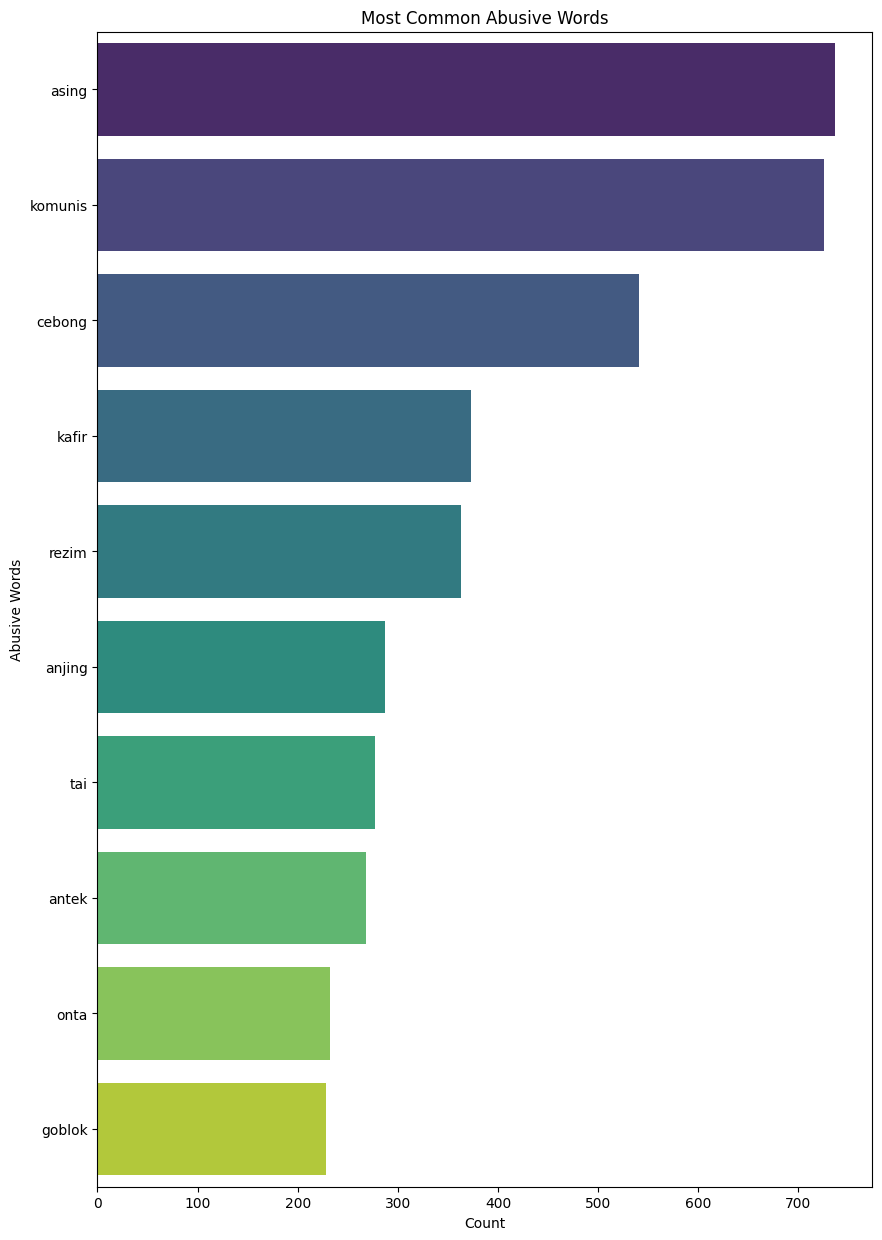

In [ ]:
keys_abusive = list(top_abusive.keys())
vals_abusive = [top_abusive[k] for k in keys_abusive]

show_only = 10

# Create plot bar
plt.figure(figsize=(10, 15))
sns.barplot(x=vals_abusive[:show_only], y=keys_abusive[:show_only], hue=keys_abusive[:show_only], palette="viridis", legend=False)
plt.title('Most Common Abusive Words')
plt.xlabel('Count')
plt.ylabel('Abusive Words')

# show plot bar
plt.show()


In [ ]:
# Classify based on Type
def tweet(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

# Create "Type" columns
df['Type'] = df.apply(tweet, axis=1)
df['Type'].value_counts()

Type
None                     5860
Hate Speech & Abusive    3295
Hate Speech              2266
Abusive                  1748
Name: count, dtype: int64

<Axes: ylabel='count'>

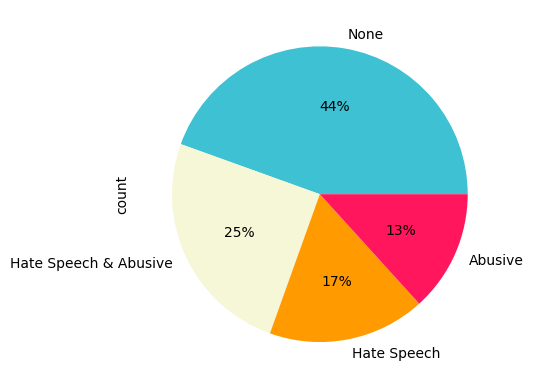

In [ ]:
# Create pie plot
df['Type'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#3EC1D3','#F6F7D7','#FF9A00','#FF165D'])

<Axes: ylabel='count'>

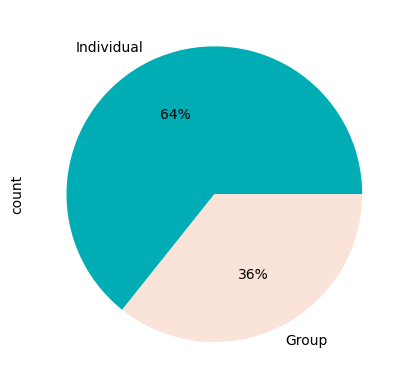

In [51]:
# Classify into Target
def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

# Create new column
df['Target'] = df.apply(target, axis=1)

# Create pie plot
filter = df['Target'] == 'None'
df[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#00ADB5','#FAE3D9'])

In [53]:
filter = df['Target'] == 'None'
df[~filter]['Target'].value_counts()

Target
Individual    3575
Group         1986
Name: count, dtype: int64